In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df4 = pd.read_csv("sales-pipeline.csv")
df4.shape

(14277, 8)

In [3]:
df4.head()

,Account,Opportunity_ID,Sales_Agent,Deal_Stage,Product,Close_Date,Close_Value,Created_On
0,Sunnamplex,67HY0MW7,Donn Cantrell,Won,GTXBasic,2017-05-06,500.0,2017-04-24
1,NaN,MA82HVCI,James Ascencio,In_Progress,GTXPro,NaN,NaN,2017-06-15
2,NaN,BRL1KVVH,Vicki Laflamme,Lost,GTXBasic,2017-08-03,0.0,2017-05-19
3,Silis,R22O68FF,Niesha Huffines,Won,GTXBasic,2017-06-27,524.0,2017-03-21
4,Silis,J78AK31N,Kami Bicknell,Won,MGRPFU,2017-08-04,4794.0,2017-05-15


In [4]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Close_Value,9912.0,1809.617433,2896.906962,0.0,0.0,584.0,3495.5,43593.0


In [5]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account         8884 non-null   object 
 1   Opportunity_ID  14277 non-null  object 
 2   Sales_Agent     14277 non-null  object 
 3   Deal_Stage      14277 non-null  object 
 4   Product         14277 non-null  object 
 5   Close_Date      9931 non-null   object 
 6   Close_Value     9912 non-null   float64
 7   Created_On      14277 non-null  object 
dtypes: float64(1), object(7)
memory usage: 892.4+ KB


In [6]:
df4.isnull().sum()

Account           5393
Opportunity_ID       0
Sales_Agent          0
Deal_Stage           0
Product              0
Close_Date        4346
Close_Value       4365
Created_On           0
dtype: int64

### Handling Missing Values

In [7]:
df4['Account'].fillna(df4['Account'].mode()[0], inplace=True)

In [8]:
# Check for missing values in the 'Categorical_Column'
missing_values = df4['Account'].isnull().sum()

print(f"Number of missing values in Categorical_Column: {missing_values}")


Number of missing values in Categorical_Column: 0


In [9]:
df4['Close_Value'].fillna(df4['Close_Value'].mean(), inplace=True)

In [10]:
# Check for missing values in the 'Numerical_Column'
missing_values = df4['Close_Value'].isnull().sum()

print(f"Number of missing values in Numerical_Column: {missing_values}")


Number of missing values in Numerical_Column: 0


In [11]:
df4['Close_Date'] = df4['Close_Date'].fillna(method='ffill')

In [12]:
# Check for missing values in the 'Numerical_Column'
missing_dates = df4['Close_Date'].isnull().sum()

print(f"Number of missing dates: {missing_dates}")

Number of missing dates: 0


# Univariate Analysis

### Numerical Columns

In [13]:
df4.select_dtypes(include=np.number).columns

Index(['Close_Value'], dtype='object')

In [14]:
plt.rcParams['figure.figsize']=[15,8]

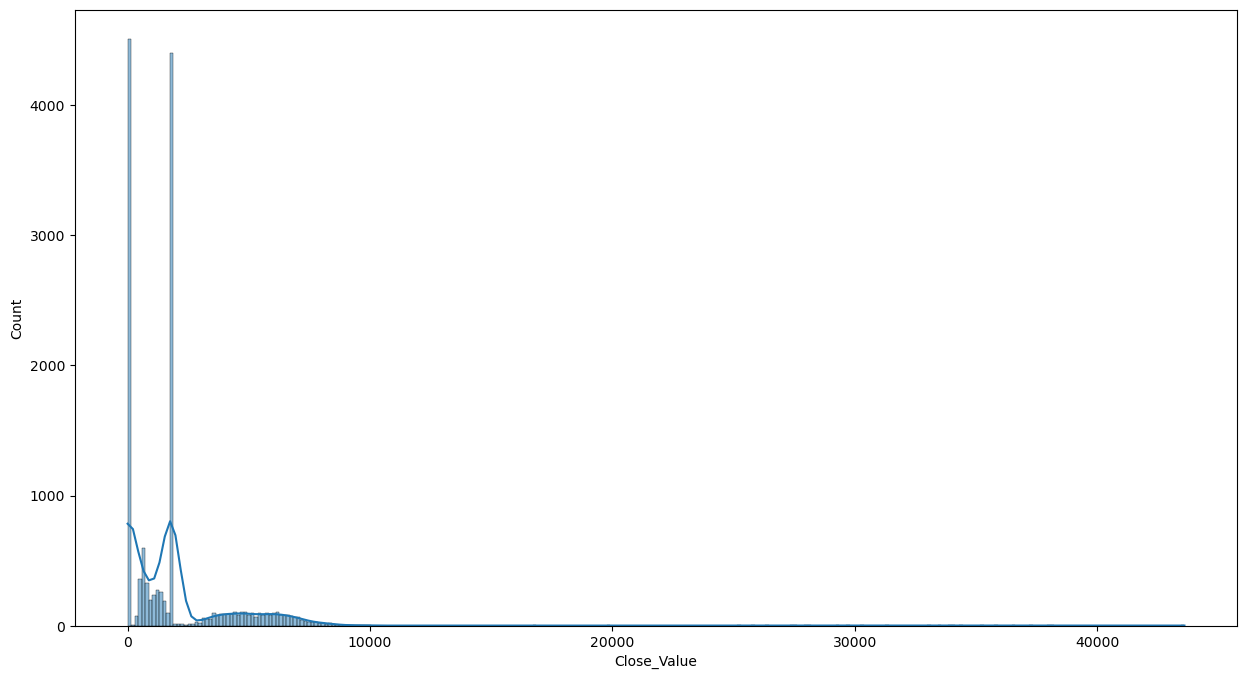

In [15]:
sns.histplot(df4['Close_Value'], kde=True)
plt.show()

### Categorical Columns

In [16]:
df4.select_dtypes(include=object).columns

Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'Deal_Stage', 'Product',
       'Close_Date', 'Created_On'],
      dtype='object')

In [17]:
plt.rcParams['figure.figsize']=[15,8]

C:\Users\Dell\AppData\Local\Temp\ipykernel_17396\441820370.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


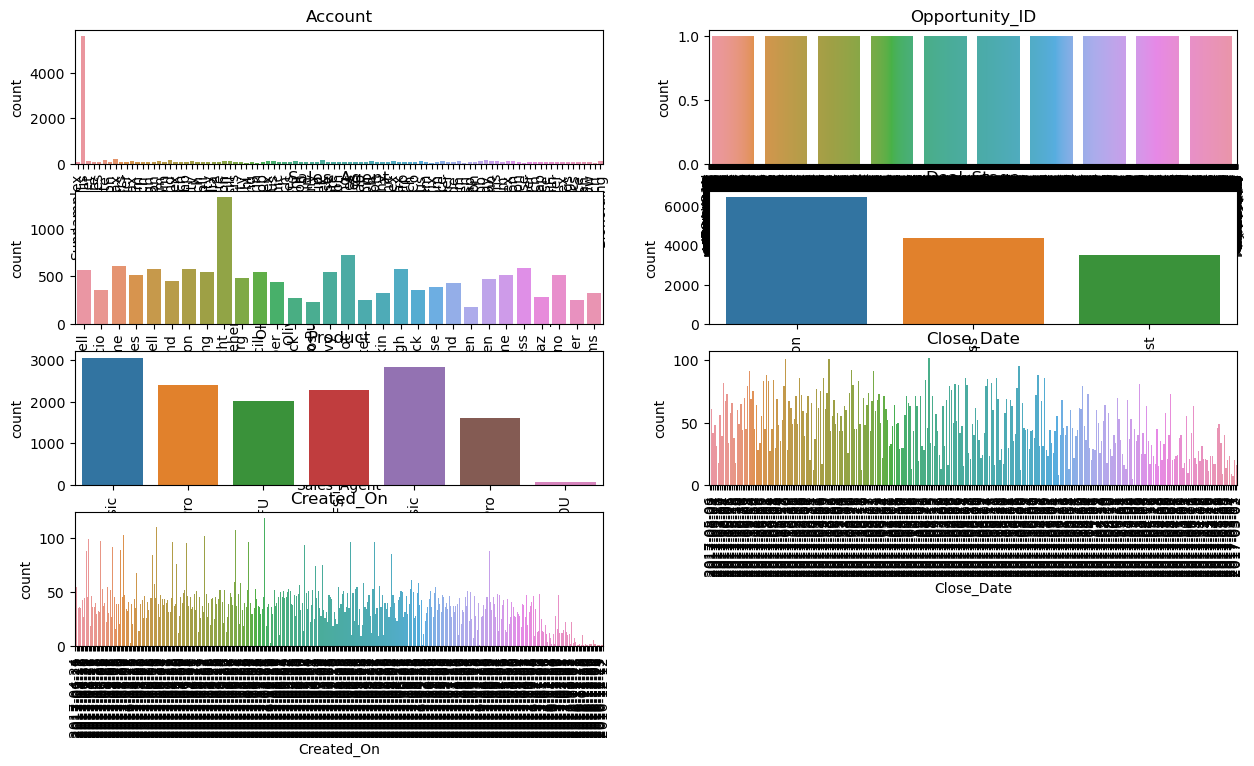

In [20]:
cols = ['Account', 'Opportunity_ID', 'Sales_Agent', 'Deal_Stage', 'Product', 'Close_Date', 'Created_On']
rows = 4
columns = 2
iterator = 1

for i in cols:
    plt.subplot(rows, columns, iterator)
    
    # Check the data type of the column
    if df4[i].dtype == 'object':
        # If it's a string (object), use countplot
        sns.countplot(data=df4, x=i)
        plt.xticks(rotation=90)
    else:
        # If it's numeric, you may consider using a different plot (e.g., histogram)
        sns.histplot(data=df4, x=i)
        
    plt.title(i)
    iterator += 1

plt.tight_layout()
plt.show()


# Bivariate Analysis

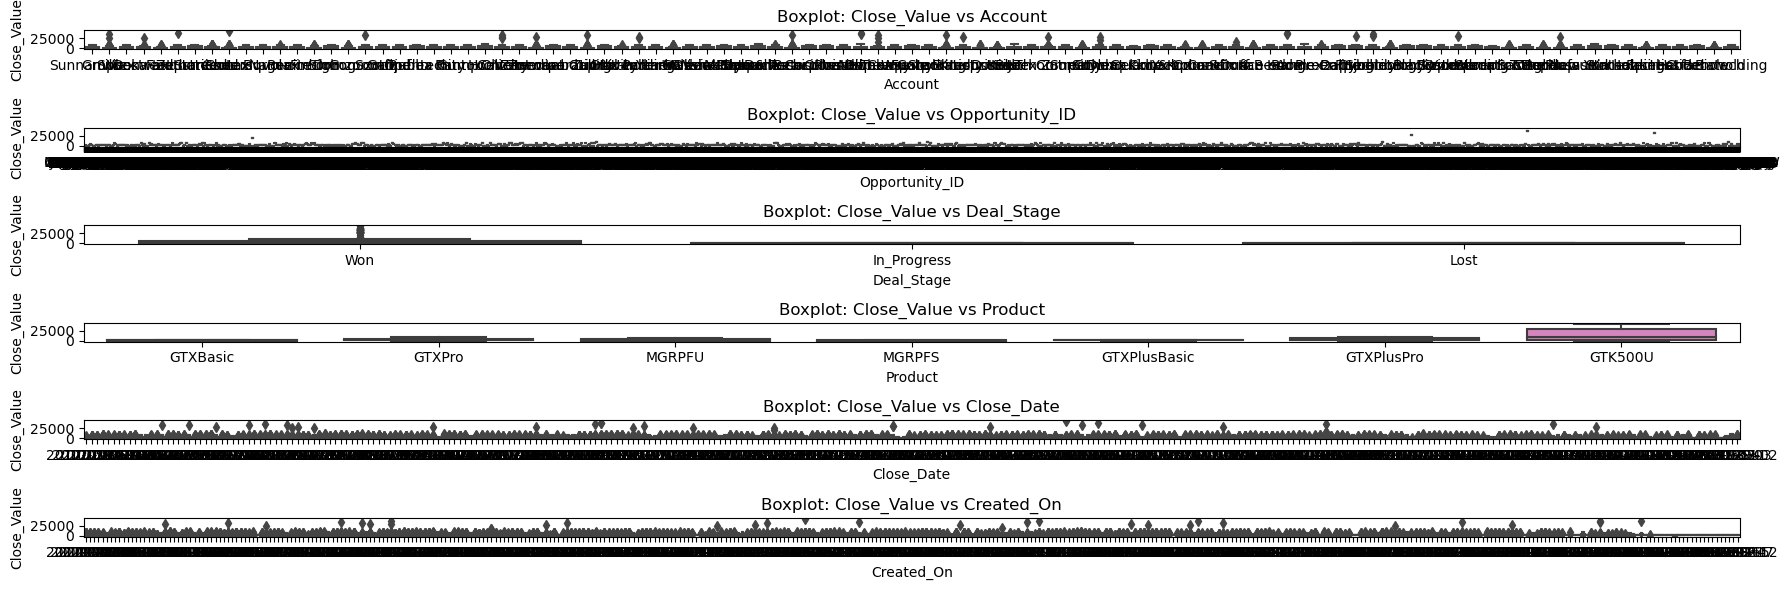

In [21]:
categorical_columns = ['Account', 'Opportunity_ID', 'Deal_Stage', 'Product', 'Close_Date', 'Created_On']

# Assuming 'Close_Value' is the numerical column
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(18, 6), sharey=True)

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='Close_Value', data=df4, ax=axes[i])
    axes[i].set_title(f'Boxplot: Close_Value vs {col}')

plt.tight_layout()
plt.show()

In [22]:
plt.rcParams['figure.figsize']=[15,8]

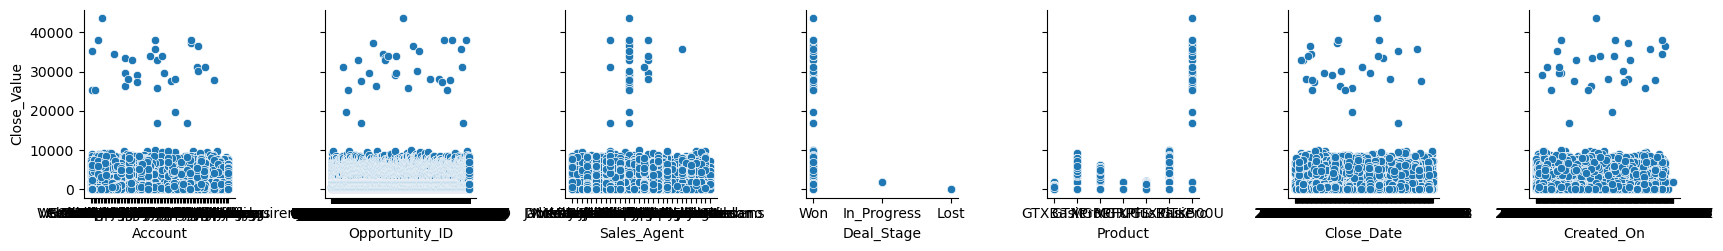

In [23]:
columns_to_plot = ['Account', 'Opportunity_ID', 'Sales_Agent', 'Deal_Stage', 'Product', 'Close_Date', 'Created_On']

sns.pairplot(df4, x_vars=columns_to_plot, y_vars='Close_Value', kind='scatter')
plt.show()

# Multivariate Analysis 

C:\Users\Dell\AppData\Local\Temp\ipykernel_17396\587531534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot=True)


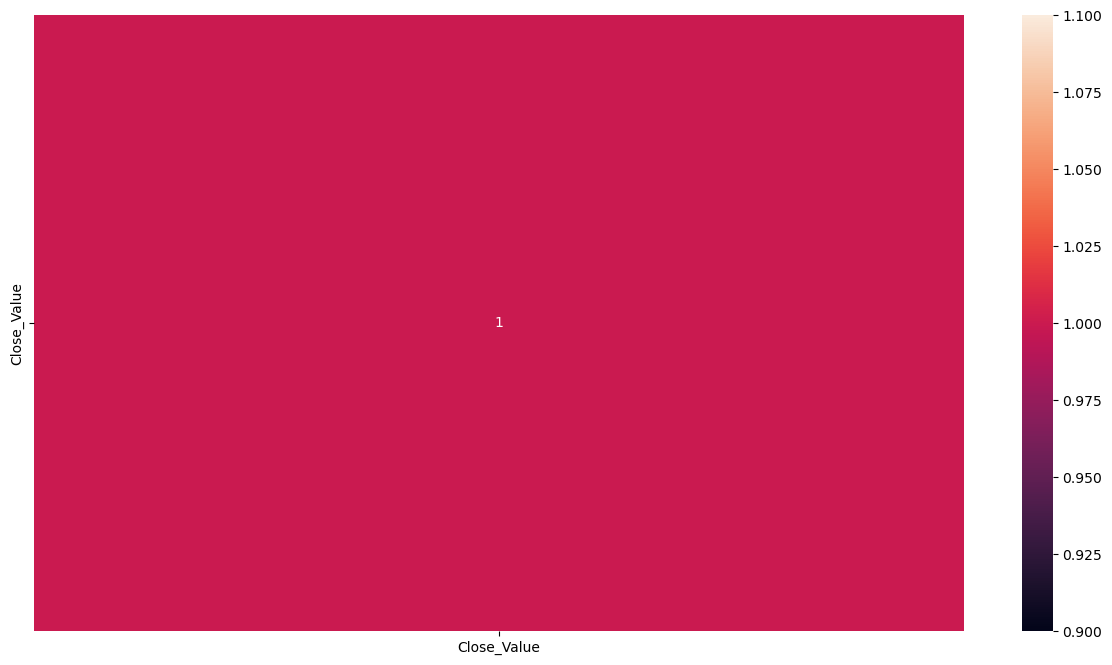

In [24]:
sns.heatmap(df4.corr(), annot=True)

plt.show()

# Outlier Treatment

<Axes: >

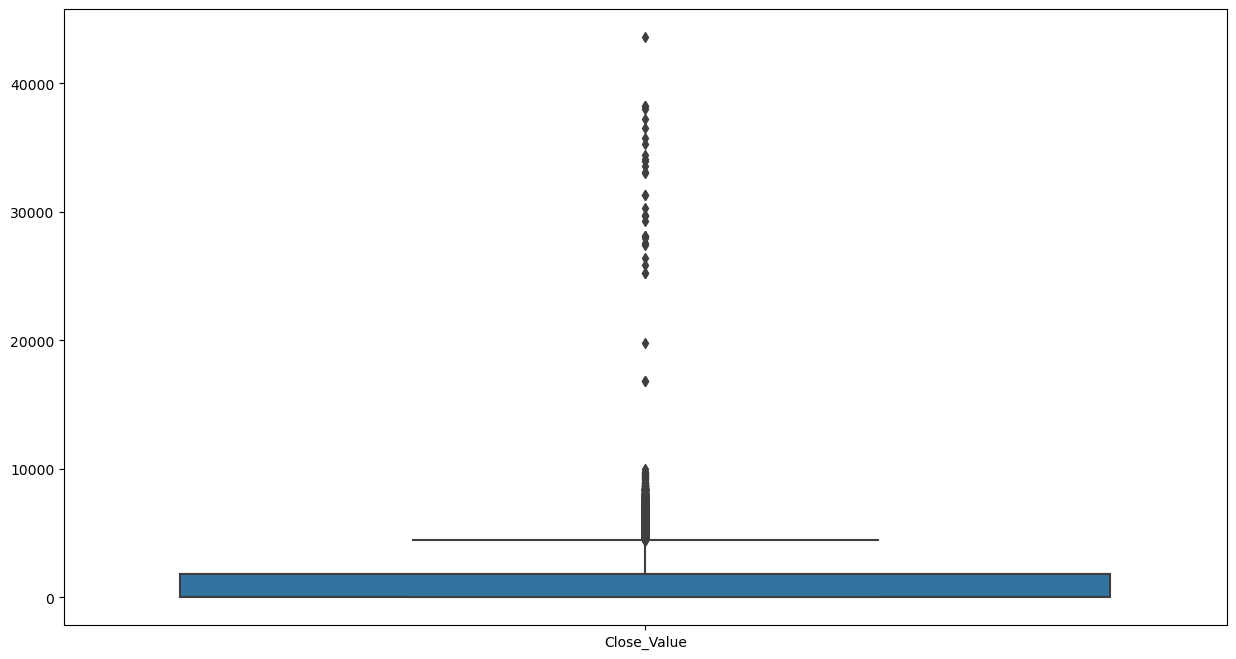

In [25]:
sns.boxplot(data=df4)

# **Inference**
* We can see that close value has an extreme outlier which is more than 400000

# **Inference**
* From the above graph we can see that there noise in some features.
* Therefore we will use 3*iqr so that we will remove extreme outliers like noise rather than the pattern

In [26]:
check = df4[['Close_Value','Account', 'Opportunity_ID', 'Sales_Agent', 'Deal_Stage', 'Product',
       'Close_Date', 'Created_On']]

q1 = check.quantile(0.25)
q3 = check.quantile(0.75)
iqr = q3 - q1

ll = q1 - 3*iqr
ul = q3 + 3*iqr

df = df4[~((check<ll)|(check>ul)).any(axis=1)]
df.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_17396\583473846.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = check.quantile(0.25)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17396\583473846.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = check.quantile(0.75)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17396\583473846.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df4[~((check<ll)|(check>ul)).any(axis=1)]


(13954, 8)

(array([1]), [Text(1, 0, 'Close_Value')])

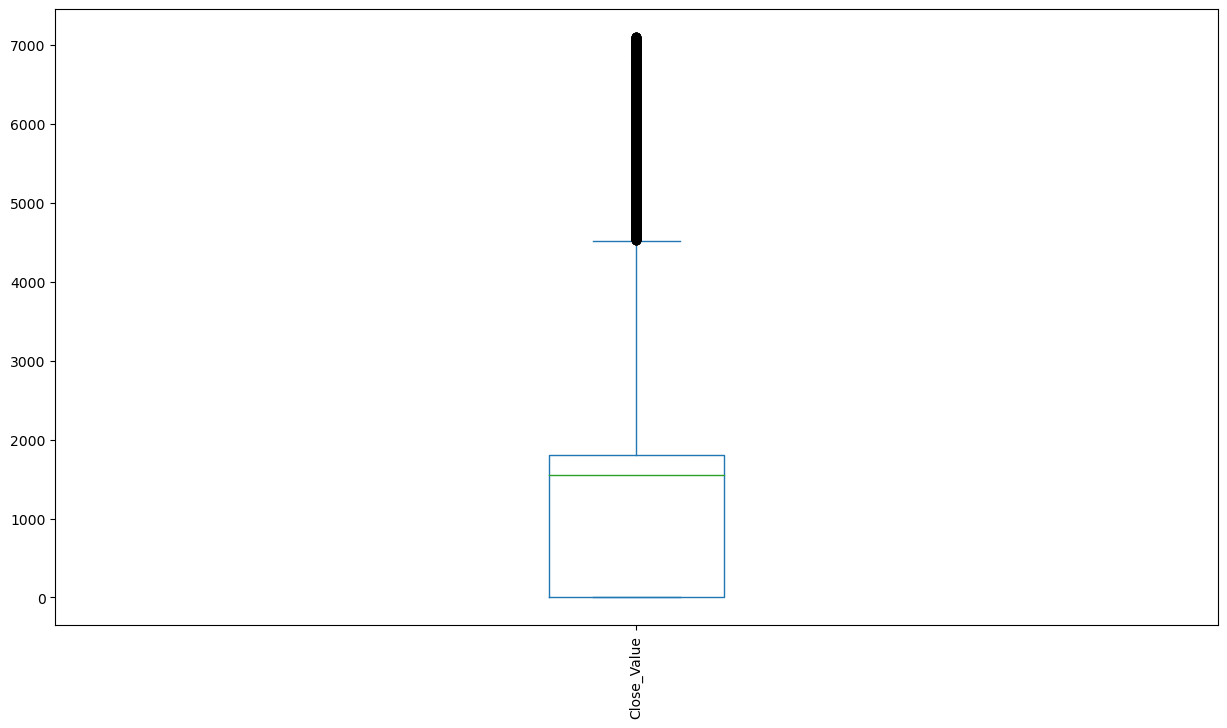

In [29]:
df.plot(kind='box')
plt.xticks(rotation=90)

# **Inference**
* From the above graph we can see that noise has been removed but the pattern is still there.